# PCA and K-Means Clustering
Principal component analysis (PCA) dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. In this project, we are going to use PCA to first select the features and then applied K-means clustering on our model.
k-means clustering is an unsupervised machine learning algorithm that seeks to segment a dataset into groups based on the similarity of datapoints. An unsupervised model has independent variables and no dependent variables.
The 
## Algorithm
For a given dataset, k is specified to be the number of distinct groups the points belong to. \
Step 1: randomly pick k points as the center.\
Step 2: calculate the distance from each data point to the center\
Step 3: Now assign each data point to the closest center according to the distance.\
Step 4：Update the center point by taking the average of the points in each cluster group.\
Step 5: Repeat the Steps 2 to 4 until the center point does not change anymore

In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA

Here we are using the breast cancer data, and we first use PCA to select the features.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AmyrMa/INDE-577/main/data/data.csv")
df = df.drop(['id','Unnamed: 32'], axis = 1)
df['diagnosis'] = np.where(df.diagnosis.values == 'M', 1, 0)
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1).values

## PCA

steps for the PCA are as follows:
1. Center and scale the data
2. Compute the covariance or correlation matrix
3. Find the eigenvalues and the orthonormal eigenvectors of S.
4. Find the principal components.
5. Reduce the dimension of the data.
Here we use the PCA built in function from the package to complete our task

In [3]:
X = PCA(n_components = 2).fit_transform(X)
X_train = StandardScaler().fit_transform(X)

## K-means Clustering

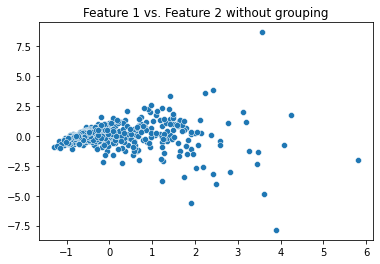

In [4]:

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                palette="deep",
                )
plt.title("Feature 1 vs. Feature 2 without grouping")
plt.show()

The following graph is our goal 

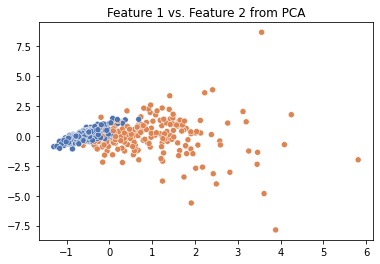

In [5]:

sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=y,
                palette="deep",
                legend=None
                )
plt.title("Feature 1 vs. Feature 2 from PCA")
plt.show()

In [6]:
def colors(y):
    if y == 0:
        return "green"
    else:
        return "yellow"

c = [colors(label) for label in y]

## Randomly Choose the center point 
we use the graph to see each step

In [7]:
np.random.seed(1)
k=2
centroids = []
for k in range(2):
    i = np.random.randint(0, 178)
    j = np.random.randint(0, 178)
    point = (X[i, 0], X[j, 1], k)
    centroids.append(point)

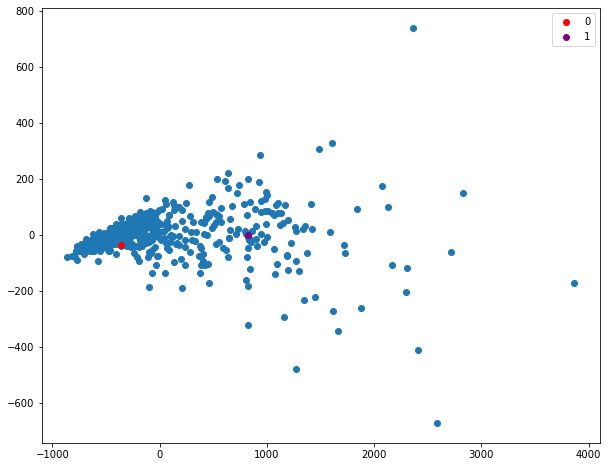

In [8]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
plt.scatter([centroids[1][0]], [centroids[1][1]], color = "purple", label = centroids[1][2])
plt.legend()
plt.show()

Here we see the two points are separated and randomly chosen

## Calculating the distance 
In order to adjust to the optimal center, we have to find the average of each center we picked

In [9]:
def distance(i, X, centroids):
    return np.sqrt(sum((X[i, j] - centroids[j])**2 for j in range(2)))

## Label and Clustering
Now we assign label and their cluster based on the distance to the center point we picked.

In [10]:
def assign_label(i, X, centroids):
    distances = np.array([distance(i, X, centroids) for centroids in centroids])
    label = np.argmin(distances)
    return label
def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

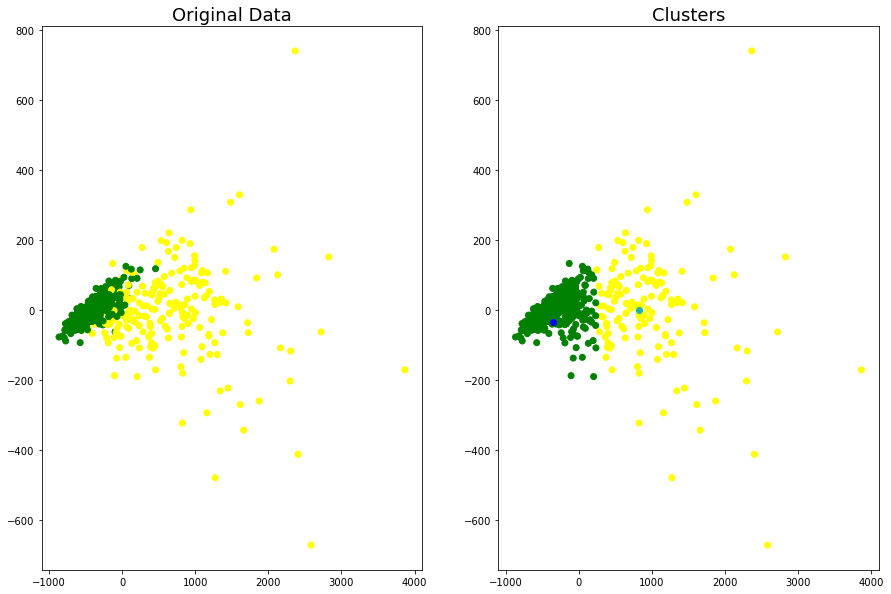

In [11]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], color = "blue", label = centroids[0][2]) #0 centroid x and y values
ax2.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
ax2.set_title("Clusters", fontsize = 18)

plt.show()

## Updating center
We see that the graph on the right are still very different from our orignal cluster, so we have to update our center point

In [12]:
def update_centroids(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    centroid_means = {i : [0, 0] for i in range(k)} 
    for i in range(len(X)):
        centroid_means[current_labels[i]][0] += X[i, 0]
        centroid_means[current_labels[i]][1] += X[i, 1] 

    for i in range(k):
        num_occur = current_labels.count(i)
        centroid_means[i][0] = centroid_means[i][0]/num_occur #take average x-value
        centroid_means[i][1] = centroid_means[i][1]/num_occur #average y-value
    
    return [(centroid_means[i][0], centroid_means[i][1], i) for i in centroid_means]

Text(0.5, 1.0, 'Updated Centroids')

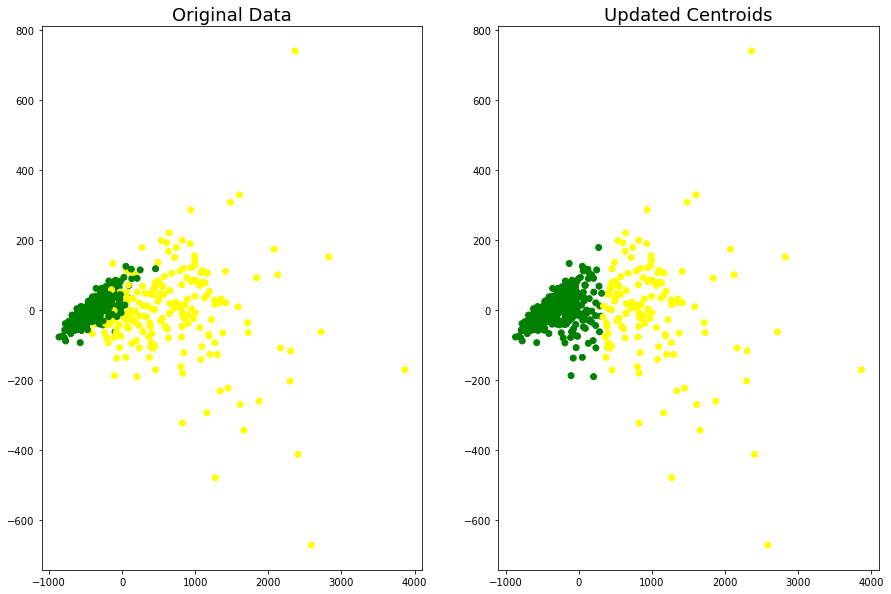

In [13]:
new_centroids = update_centroids(X, centroids)
current_labels = assign_clusters(X, new_centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.set_title("Updated Centroids", fontsize = 18)

In [14]:
def k_means_clustering(X, k, max_iter = 100):
    centroids = []
    np.random.seed(1)
    for j in range(k):
        i = np.random.randint(0, len(X))
        point = (X[i, 0], X[i, 1], j)
        centroids.append(point)
    
    for _ in range(max_iter):
        centroids = update_centroids(X, centroids)

    return centroids
    

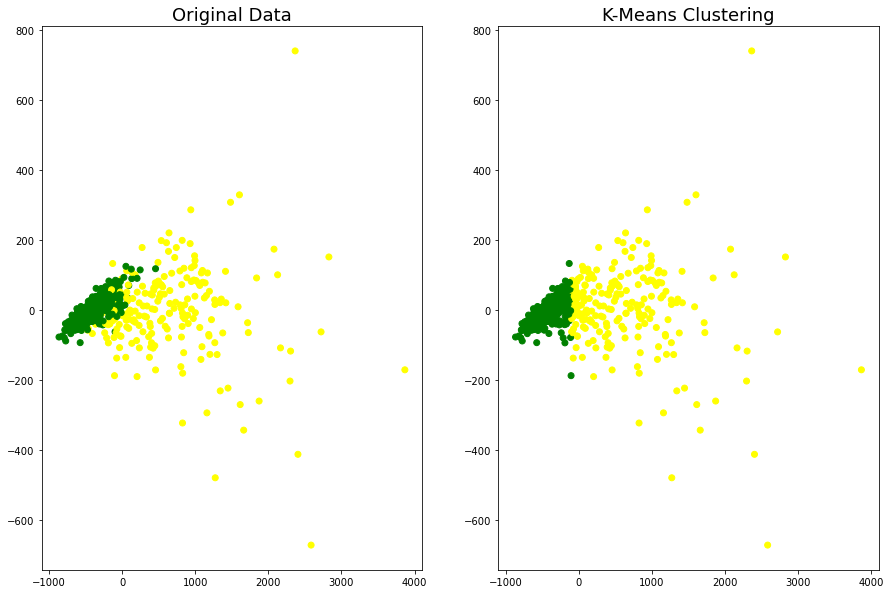

In [15]:
centroids = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.set_title("K-Means Clustering", fontsize = 18)
plt.show()

In [16]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, current_labels))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       357
           1       0.72      0.50      0.59       212
           2       0.00      0.00      0.00         0

    accuracy                           0.74       569
   macro avg       0.55      0.46      0.50       569
weighted avg       0.85      0.74      0.79       569



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusion
We see that the cluster are getting better, however it is still far away from our orignal data, but this is as expected. since we cannot determine the type of cancer from just two features.